Vehicle Insurance Claims Prediction

The "Vehicle Insurance Claims Prediction" project was part of the "Allstate Claim Prediction Challenge" on Kaggle, held on 13-07-2011, with a focus on predicting claims payments. The goal was to develop predictive models to estimate insurance claims payments based on historical data and relevant features, using various machine learning techniques, data preprocessing methods, and feature engineering approaches to improve prediction accuracy.

Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

Import data:

In [2]:
train_data = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\train_set.csv')
train_y = train_data['Claim_Amount']

x_train, x_test, y_train, y_test = train_test_split(train_data, train_y, test_size=0.3)

#test_data = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\test_set.csv')
#example_entry = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\example_entry.csv')
#test_data = test_data.merge(example_entry, on='Row_ID', how='left')
#y_test = test_data['Claim_Amount']

In [3]:
print('Number of training samples: ', format(len(train_data),','))
print('Number of test samples: ', format(len(test_data), ','))
print('Train % : ', round(len(train_data) / (len(train_data) + len(test_data)), 3)*100,'%')
print('Test %  : ', round(len(test_data) / (len(train_data) + len(test_data)), 3)*100, '%')

Number of training samples:  13,184,290
Number of test samples:  4,314,865
Train % :  75.3 %
Test %  :  24.7 %


In [4]:
print('Features in training data: \n', train_data.columns)
print('Features in test data: \n', test_data.columns)

Features in training data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')
Features in test data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')


In [56]:
train_data.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [54]:
Unique_HID = train_data['Household_ID'].nunique() / len(train_data['Household_ID'])
print("% of unique values in Household_ID: {:.2f}%".format(Unique_HID * 100))

% of unique values in Household_ID: 32.68%


In [26]:
print(train_data['Vehicle'].nunique())
np.sort(train_data['Vehicle'].unique())

28


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29], dtype=int64)

In [101]:
vehicle_stats = train_data.groupby(by='Vehicle')['Claim_Amount'].agg(['sum', 'count'])
vehicle_stats['% of occurrence'] = round((vehicle_stats['count'] / vehicle_stats['count'].agg('sum')) * 100, 4)
print(vehicle_stats)

                  sum    count  % of occurrence
Vehicle                                        
1        8.466029e+06  6363423          48.2652
2        5.238684e+06  3874475          29.3871
3        2.475997e+06  1755032          13.3115
4        1.097424e+06   714805           5.4216
5        3.898626e+05   277944           2.1081
6        1.548966e+05   114869           0.8713
7        6.690532e+04    47576           0.3609
8        2.371948e+04    19845           0.1505
9        1.525438e+04     8533           0.0647
10       5.131760e+03     3824           0.0290
11       2.089310e+03     1866           0.0142
12       1.386712e+03      931           0.0071
13       5.279128e+02      493           0.0037
14       0.000000e+00      273           0.0021
15       0.000000e+00      151           0.0011
16       1.034899e+02       96           0.0007
17       0.000000e+00       62           0.0005
18       0.000000e+00       30           0.0002
19       1.303231e+03       25          

<Axes: title={'center': 'Vehicle # within the household - Claim Amount'}, xlabel='Vehicle # within the household', ylabel='Sum of claim amount'>

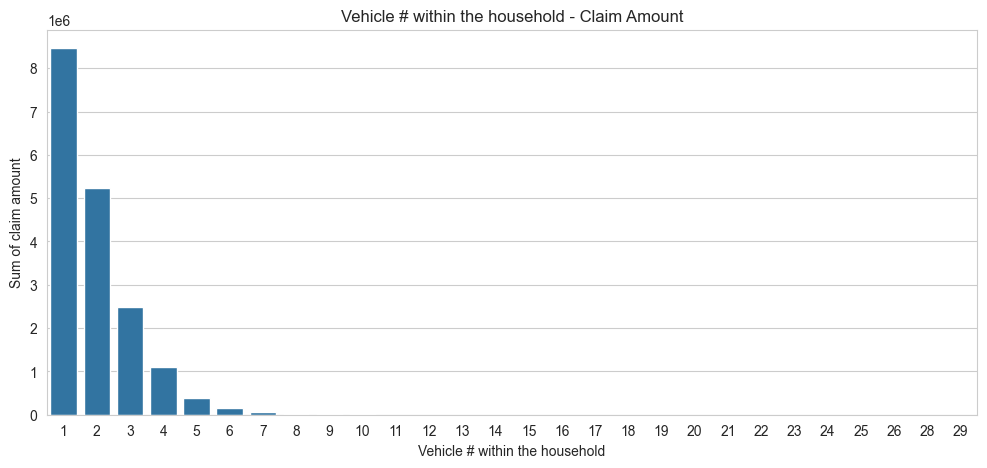

In [102]:
plt.figure(figsize=(12,5))
plt.title('Vehicle # within the household - Claim Amount')
plt.xlabel('Vehicle # within the household')
plt.ylabel('Sum of claim amount')
sns.barplot(train_data.groupby(by='Vehicle')['Claim_Amount'].agg('sum'))

In [73]:
train_data.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [81]:
train_data[['Row_ID', 'Household_ID', 'Vehicle']].head(16)

,Row_ID,Household_ID,Vehicle
0,1,1,3
1,2,2,2
2,3,3,1
3,4,3,1
4,5,3,2
5,6,3,2
6,7,4,1
7,8,4,2
8,9,4,3
9,10,5,1


In [83]:
train_data[train_data['Household_ID']==5]

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
10,11,5,1,2006,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
11,12,5,3,2005,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
12,13,5,3,2006,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
13,14,5,4,2005,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
14,15,5,4,2006,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0


In [19]:
train_data['Calendar_Year'].unique()

array([2005, 2006, 2007], dtype=int64)

In [27]:
print(train_data['Model_Year'].nunique())
np.sort(train_data['Model_Year'].unique())

29


array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype=int64)

In [30]:
print(train_data['Blind_Make'].nunique())
np.sort(train_data['Blind_Make'].unique())

75


array(['?', 'A', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'AZ', 'B', 'BA', 'BB', 'BC', 'BD', 'BF',
       'BG', 'BH', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS',
       'BT', 'BU', 'BV', 'BW', 'BY', 'BZ', 'C', 'CA', 'CB', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [29]:
print(train_data['Blind_Model'].nunique())
np.sort(train_data['Blind_Model'].unique())

1303


array(['?', 'A.2', 'A.3', ..., 'Z.45', 'Z.5', 'Z.8'], dtype=object)

In [31]:
print(train_data['Blind_Submodel'].nunique())
np.sort(train_data['Blind_Submodel'].unique())

2740


array(['?', 'A.2.0', 'A.3.0', ..., 'Z.45.0', 'Z.5.0', 'Z.8.0'],
      dtype=object)

In [32]:
print(train_data['Cat1'].nunique())
np.sort(train_data['Cat1'].unique())

11


array(['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype=object)

In [35]:
print(train_data['OrdCat'].nunique())
train_data['OrdCat'].unique()

15


array(['4', '5', '2', '6', '3', '?', '1', '7', 4, 2, 5, 3, 1, 6, 7],
      dtype=object)

In [38]:
print(train_data['Var1'].nunique())
np.sort(train_data['Var1'].unique()[:10])

360


array([-0.7542818, -0.6337572, -0.3766379,  0.017076 ,  0.2179505,
        0.3224052,  0.4429298,  0.5634545,  0.7000491,  1.2705325])

In [40]:
print(train_data['NVCat'].nunique())
train_data['NVCat'].unique()

15


array(['M', 'O', 'F', 'N', 'J', 'L', 'B', 'H', 'A', 'G', 'K', 'I', 'E',
       'C', 'D'], dtype=object)

In [41]:
print(train_data['NVVar1'].nunique())
train_data['NVVar1'].unique()

29


array([-0.2315299,  2.0546834,  1.4831301,  3.1977899,  2.5119259,
        1.1401981,  0.9115767,  4.3408966,  6.62711  ,  1.7280815,
        0.7482758,  0.6258001,  2.7078872,  3.8836539,  5.2553821,
        4.9124498,  0.4543341,  3.6876929,  1.2926123,  4.05512  ,
        2.3404601,  0.5305412,  0.6829554,  1.8260621,  1.6390083,
        0.3400235,  5.4840031,  1.0154955,  2.8167543])

In [ ]:
sns.heatmap(train_data.corr())

In [109]:
train_data.groupby(by='Cat1')['Claim_Amount'].mean()

Cat1
?    0.793362
A    1.196787
B    1.475656
C    1.289835
D    1.313834
E    1.149625
F    1.425081
G    1.264641
H    1.269609
I    1.336931
J    1.178263
Name: Claim_Amount, dtype: float64

In [117]:
train_data['Vehicle'].dtype.name

'int64'

In [144]:
cat_feats = train_data[train_data.dtypes[train_data.dtypes == 'object'].index]

,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,NVCat
0,K,K.78,K.78.2,D,C,F,?,?,C,?,C,A,B,F,D,4,M
1,Q,Q.22,Q.22.3,B,C,A,A,A,E,C,A,B,A,B,D,5,O
2,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,A,E,D,2,F
3,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,B,B,2,F
4,D,D.20,D.20.0,J,C,B,?,?,D,?,A,B,A,B,B,5,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184285,BW,BW.156,BW.156.0,I,?,C,?,?,E,?,A,B,A,B,E,5,M
13184286,AJ,AJ.123,AJ.123.3,D,?,C,?,?,C,?,A,B,C,A,C,4,M
13184287,X,X.52,X.52.1,B,?,D,A,A,C,C,A,B,A,B,B,2,E
13184288,W,W.4,W.4.6,I,?,A,?,?,C,?,A,B,B,A,D,4,E


In [145]:
train_data[train_data.dtypes[train_data.dtypes != 'object'].index].corr()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,1.000000,0.994470,0.020139,-0.177093,-0.054351,-0.062934,-0.054210,-0.057491,-0.054159,-0.060981,-0.045293,-0.046234,-0.016714,-0.001141,-0.012842,-0.009388,-0.006362,0.000633
Household_ID,0.994470,1.000000,0.015480,-0.161985,-0.048958,-0.063712,-0.052323,-0.057404,-0.052412,-0.061431,-0.045204,-0.047006,-0.014085,0.000120,-0.012389,-0.009355,-0.005179,0.000582
Vehicle,0.020139,0.015480,1.000000,-0.002585,0.002765,0.055557,0.063244,0.054849,0.065417,0.034393,0.062252,0.051910,0.036160,0.000717,0.105459,0.133182,-0.014967,0.000965
Calendar_Year,-0.177093,-0.161985,-0.002585,1.000000,0.135569,0.024397,0.069793,0.034714,0.067125,0.021759,0.043073,0.028594,0.052651,-0.004500,-0.003462,0.002041,-0.010975,-0.003552
Model_Year,-0.054351,-0.048958,0.002765,0.135569,1.000000,0.124525,0.437288,0.146790,0.406604,0.137433,0.245761,0.138849,0.387272,-0.007100,-0.008775,-0.044383,0.027893,0.000172
Var1,-0.062934,-0.063712,0.055557,0.024397,0.124525,1.000000,0.558581,0.746443,0.575940,0.906207,0.778708,0.676867,0.268957,-0.021653,-0.043677,-0.009439,-0.065441,-0.000859
Var2,-0.054210,-0.052323,0.063244,0.069793,0.437288,0.558581,1.000000,0.645778,0.982652,0.571880,0.772238,0.507974,0.701798,-0.019861,-0.052414,-0.025321,-0.057532,-0.001338
Var3,-0.057491,-0.057404,0.054849,0.034714,0.146790,0.746443,0.645778,1.000000,0.657003,0.786107,0.827266,0.668288,0.358608,-0.037742,-0.048284,-0.017624,-0.073611,-0.001142
Var4,-0.054159,-0.052412,0.065417,0.067125,0.406604,0.575940,0.982652,0.657003,1.000000,0.592415,0.785960,0.520187,0.690939,-0.019658,-0.053342,-0.024304,-0.059912,-0.001201
Var5,-0.060981,-0.061431,0.034393,0.021759,0.137433,0.906207,0.571880,0.786107,0.592415,1.000000,0.750433,0.497583,0.302095,-0.024238,-0.043789,-0.011557,-0.066301,-0.000186


In [147]:
train_data[train_data.dtypes[train_data.dtypes != 'object'].index].corrwith(train_data['Claim_Amount'])

Row_ID           0.000633
Household_ID     0.000582
Vehicle          0.000965
Calendar_Year   -0.003552
Model_Year       0.000172
Var1            -0.000859
Var2            -0.001338
Var3            -0.001142
Var4            -0.001201
Var5            -0.000186
Var6            -0.001316
Var7            -0.001424
Var8            -0.001558
NVVar1           0.000487
NVVar2           0.001443
NVVar3           0.001943
NVVar4           0.000140
Claim_Amount     1.000000
dtype: float64

In [5]:
sum(test_data['Claim_Amount'])

0

In [7]:
train_data['Claim_Amount'].unique()

array([  0.       ,  24.20559  ,   2.624877 , ...,   1.849161 ,
       371.1561   ,   0.6814533])